In [2]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import find_files, save_files
import torch
import torchvision.transforms.functional as TF
from PIL import Image

In [4]:
FIND_DIR = '/home/eiden/eiden/DB/octc/data_multi_origin'
SAVE_DIR = './data_multi_random_noise'


files = find_files(directory = FIND_DIR, extension= 'png')
files[-1]

'/home/eiden/eiden/DB/octc/data_multi_origin/train/2/2_R1007_00002.png'

In [5]:
def generate_random_binary_mask(size, density=0.5):
    """
    주어진 크기의 이진 마스크를 생성하는 함수
    :param size: 이진 마스크의 크기 (가로, 세로)
    :param density: 1로 설정할 비율 (기본값: 0.5)
    :return: 이진 마스크
    """
    mask = np.zeros(size, dtype=np.uint8)
    num_ones = int(np.prod(size) * density)
    indices = np.random.choice(np.prod(size), num_ones, replace=False)
    mask.ravel()[indices] = 1
    return mask

def apply_binary_mask(image, binary_mask, target_value = 255):
    # PIL 이미지로 변환
    if isinstance(image, torch.Tensor):
        image = TF.to_pill_image(image)
        
    # image to tensor
    image = TF.to_tensor(image)
    
    # 이진 마스크를 0또는 target_value값으로 채우기
    mask_value = torch.full_like(binary_mask, target_value)
    mask_value[binary_mask == 0] = 0
    
    print(mask_value.unique())
    # 이미지에 마스크 적용
    masked_image = image.clone()
    for c in range(masked_image.shape[0]):
        masked_image[c] = masked_image[c].where(binary_mask == 1, mask_value)
        
        
    return masked_image

tensor([  0, 255], dtype=torch.uint8)


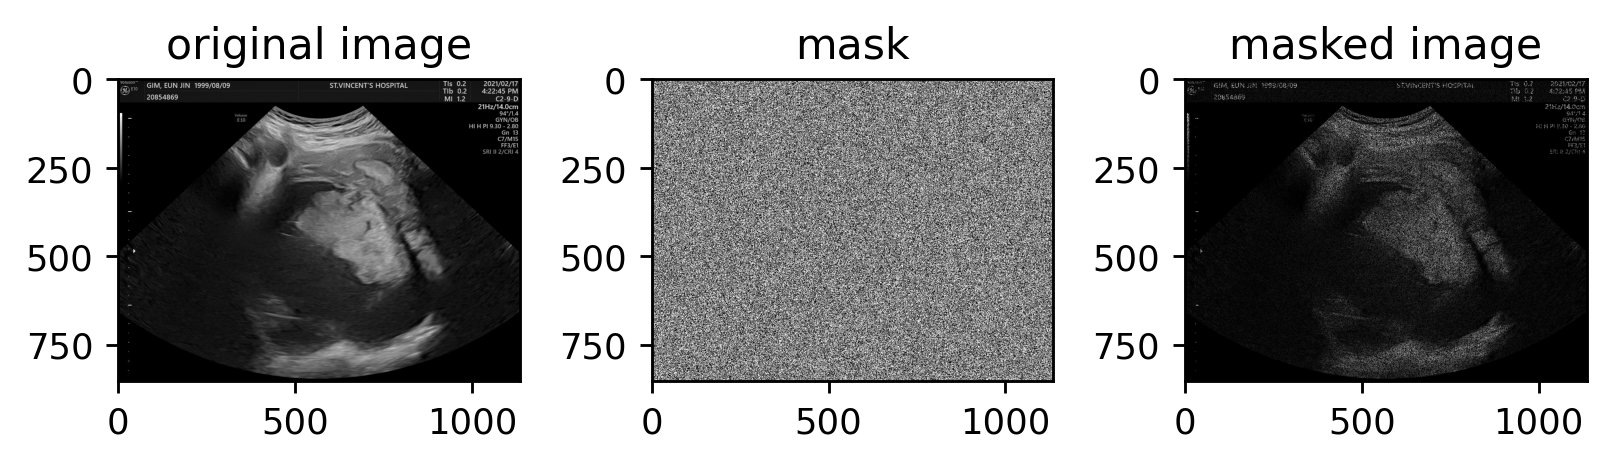

In [10]:
for file in files:
    image = np.array(Image.open(file))
    # binary_mask = generate_random_binary_mask((512, 512), density=0.1)
    binary_mask = torch.randint(0, 2, size=(image.shape[0], image.shape[1]), dtype = torch.uint8)
    # 이진 마스크 생성
    masked_image = apply_binary_mask(image = image, binary_mask = binary_mask, target_value = 255)
    
    plt.figure(dpi=256)
    plt.subplot(131)
    plt.imshow(image, cmap ='gray')
    plt.title('original image')
    plt.subplot(132)
    plt.imshow(binary_mask, cmap ='gray')
    plt.title('mask')
    plt.subplot(133)
    plt.imshow(masked_image[0], cmap ='gray')
    plt.title('masked image')
    plt.tight_layout()
    plt.show()
    break
    